In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib
import sys
from datetime import datetime, timedelta
from time import sleep, time
import numpy as np

In [3]:
df0 = pd.read_csv("user_data_slot9_0525-3125/Orlando_Soto_-_Slot_9/RUN_8_USER_/data_CHARMB_7.csv")
df1 = pd.read_csv("user_data_jun/USER_Orlando_Soto_-_Slot_10-11/RUN_9_USER_/data_CHARMB_7.csv")
df2 = pd.read_csv("user_data_jun/USER_Orlando_Soto_-_Slot_10-11/RUN_10_USER_/data_CHARMB_7.csv")
df3 = pd.read_csv("user_data_jun/USER_Orlando_Soto_-_Slot_10-11/RUN_10_USER_/data_CHARMB_7_2.csv")
df0.columns

print ("TID: {}".format(float(df0.iloc[-1]['TID_RAW1']) + float(df1.iloc[-1]['TID_RAW1']) + float(df2.iloc[-1]['TID_RAW1']) + float(df3.iloc[-1]['TID_RAW1'])))
print ("HEH: {}".format(float(df0.iloc[-1]['HEH']) + float(df1.iloc[-1]['HEH']) + float(df2.iloc[-1]['HEH']) + float(df2.iloc[-1]['HEH'])))
print ("N1MeV: {}".format(float(df0.iloc[-1]['N1MeV_RAW0']) + float(df1.iloc[-1]['N1MeV_RAW0']) + float(df2.iloc[-1]['N1MeV_RAW0']) + float(df2.iloc[-1]['N1MeV_RAW0'])))

TID: 305.30520589
HEH: 6.1211429257e+11
N1MeV: 3.86732294304e+12


In [4]:
# df0['Time'] = df0['Time'].astype('datetime64[ns]')
# df1['Time'] = df1['Time'].astype('datetime64[ns]')
# df2['Time'] = df2['Time'].astype('datetime64[ns]')
# df3['Time'] = df3['Time'].astype('datetime64[ns]')
vname = 'TID_RAW1' 
df1[vname] = df1[vname].apply(lambda x: x + df0.iloc[-1][vname])
df2[vname] = df2[vname].apply(lambda x: x + df1.iloc[-1][vname])
df3[vname] = df3[vname].apply(lambda x: x + df2.iloc[-1][vname])

vname = 'HEH' 
df1[vname] = df1[vname].apply(lambda x: x + df0.iloc[-1][vname])
df2[vname] = df2[vname].apply(lambda x: x + df1.iloc[-1][vname])
df3[vname] = df3[vname].apply(lambda x: x + df2.iloc[-1][vname])

vname = 'N1MeV_RAW0' 
df1[vname] = df1[vname].apply(lambda x: x + df0.iloc[-1][vname])
df2[vname] = df2[vname].apply(lambda x: x + df1.iloc[-1][vname])
df3[vname] = df3[vname].apply(lambda x: x + df2.iloc[-1][vname])

df = pd.concat([df0,df1,df2,df3], axis=0)
df['Time'] = df['Time'].astype('datetime64[ns]')
df.index = df['Time'] 
df = df.rename(columns={'TID_RAW1':'TID','N1MeV_RAW0':'N1MeV'})

In [5]:
df['HEH_TID'] = df['HEH']/df['TID'] 
df['N1MeV_TID'] = df['N1MeV']/df['TID'] 

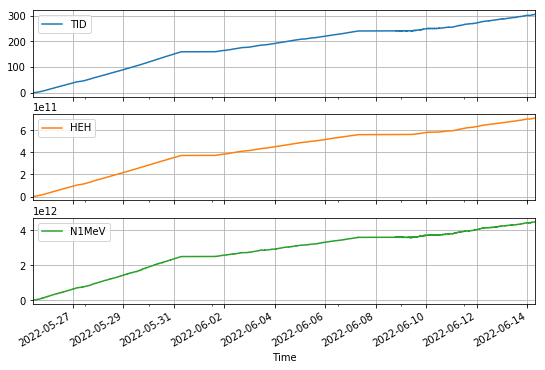

In [6]:
df.loc[:,(df.columns=='TID') | (df.columns=='HEH') | (df.columns=='N1MeV')].plot(grid=True,subplots=True, figsize=(9,6))
#df.loc[:,(df.columns=='HEH_TID') | (df.columns=='N1MeV_TID')].plot(grid=True,subplots=True, figsize=(9,6))

#df['HEH_TID'].plot(grid=True,subplots=True, figsize=(9,6), ylim=(2.3e9,2.5e9))
#df['HEH'].plot(grid=True,subplots=True, figsize=(9,6))
#df['N1MeV'].plot(grid=True,subplots=True, figsize=(9,6))
#df['HEH'].plot(grid=True,x='Time',subplots=True, figsize=(9,6))
#df['N1MeV'].plot(grid=True,x='Time',subplots=True, figsize=(9,6))

#plt.savefig('FirstRunAna/beam_all_HEHToTID.png', bbox_inches='tight')
plt.show()

In [55]:
df[('2022-05-29 13:40:00'<df['Time'])&(df['Time']<'2022-05-29 13:40:50')]
tst=df.iloc[1]['Time']
tend=df.iloc[-1]['Time']
#tend=timedelta(2022,6,14,7,48,55)
#tst =timedelta(2022,5,25,10,9,53)
dt = tend-tst
TID_avg_charm = df.iloc[-1]['TID']/dt.total_seconds()
TID_avg_P2 = 123./(10*365*24*60*60)

print("avg TID rate: {} Gy/s".format(TID_avg_charm))
print("avg TID rate LHC: {} Gy/s".format(TID_avg_P2))
print("seconds CHARM/P2: {} ".format(TID_avg_charm/TID_avg_P2))
print("20min on charm -> {} days P2".format(TID_avg_charm/TID_avg_P2*20*60/60/60/24))


#df.iloc[1]['Time']

avg TID rate: 0.000177555548879 Gy/s
avg TID rate LHC: 3.900304414e-07 Gy/s
seconds CHARM/P2: 455.235104834 
20min on charm -> 6.32270978936 days P2


<IPython.core.display.Javascript object>


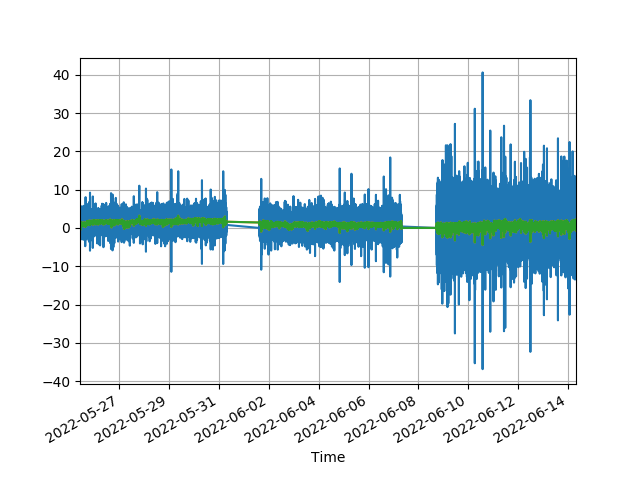

In [12]:
%matplotlib notebook
plt.cla()
df['TID_RAW1_DIFF'] = df['TID'].diff()*100
df['TID_RAW1_DIFF_EMA'] = df['TID'].diff().ewm(span = 15).mean()*100
df['TID_RAW1_EMA'] = df['TID'].ewm(span=15).mean()
df['TID_RAW1_EMA_DIFF'] = df['TID_RAW1_EMA'].diff()*100
#df['TID_RAW1'].plot(grid=True)
df['TID_RAW1_DIFF'].plot(grid=True)
df['TID_RAW1_DIFF_EMA'].plot(grid=True)
df['TID_RAW1_EMA_DIFF'].plot(grid=True)

plt.show()